### Phase 1:  Introduction and Data Collection

### Introduction

EDSA has provided a challege to construct regression capable of accurately predicting how much a kilogram of golden delicious apples apple will cost given certain parameters. This challenge will follow the five phases of the data science process, which include data collection, cleaning, exploratory data analysis, model building and model deployment.



### Data Collection

The data for this dataset was obtained from Durban Fresh Produce Market and adjusted to suit this challenge's needs.
The data supplied includes:
sample_submission.csv - Sample of the submission format for the hackathon.
df - test_set.csv - The test split of the dataset.
df - train_set.csv - The training split of the dataset.

# Phase 2: Data Cleaning

We will start by first importing some of the packages we will need to clean and explore our data. This is not an exclusive list of all the packages. Should we need more packages in the process we will import them at a later stage as needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('Advanced_regression_predict-Starter-Data-2629/df-train_set.csv') # import the train data for exploration

In [3]:
df_train.head()# explore the data

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [5]:
df_train.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64

The first step in our datacleaning process is to check for null values and decide how to deal with them. As we can see the table has 13 columns, all the columns are set as non_ null which tells us that we dont have any null values to deal with. 
If we have a look at the data types, we can already tell that most of the data types are appropriate for the columns, The only data type that we could change would be the date column, should we need the date column in our data analysis or model building phase it would be easier to deal with it as a datetime datatype rather than an object.

In [6]:
df_train['Date'] = pd.to_datetime(df_train['Date']) # change the date column from string datatype
                                                    # to datetime datatype

In [7]:
df_train.info() # lets confirm our changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          64376 non-null  object        
 1   Container         64376 non-null  object        
 2   Size_Grade        64376 non-null  object        
 3   Weight_Kg         64376 non-null  float64       
 4   Commodities       64376 non-null  object        
 5   Date              64376 non-null  datetime64[ns]
 6   Low_Price         64376 non-null  float64       
 7   High_Price        64376 non-null  float64       
 8   Sales_Total       64376 non-null  float64       
 9   Total_Qty_Sold    64376 non-null  int64         
 10  Total_Kg_Sold     64376 non-null  float64       
 11  Stock_On_Hand     64376 non-null  int64         
 12  avg_price_per_kg  64376 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 6.4+ MB


# Phase 3: Exploratory Data Analysis

## Univariate Analysis

Lets analyse each feature to see what insights we can gain from them. As we can see, we have 5 categorical data types and 8 numerical datatypes. We will analyse the numerical data types using descriptive statistics.

In [8]:
new_df_train = df_train[df_train.Commodities == 'APPLE GOLDEN DELICIOUS'] # filter for APPLE GOLDEN DELICIOUS
new_df_train.describe()# calculates our 5 number summary as well as our measures of central tendency

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


From this breakdown we can see that the maximum average price per kg we have sold our golden apples for is R21.24 and the minimum is R0.25.

In [9]:
new_df_train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

From this analysis we can see that almost all of our features have a high positive skew meaning that most of our data is skewed to the left. 

In [10]:
new_df_train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

This indicates that most of our data has High kurtosis which indicates a large number of outliers exist in our data. Why is that?? maybe because the quantities purchased from the market were varied. Some people purchased 400 kg worth of apples, probably for resale at wholesalers and some bought 3kg worth of apples e.g maybe for household or for resale at a street corner. Therefore the skewness and kurtosis of most of our columns is to be expected.However, we can see that our avrage price per kg is fairly symmetrical and a low kutosis whis is to be expected because the avg_price_per_kg column is a calculated column that has been averaged and calculated per kg.

 Lets look at the distribution of our numerical features to get a better understanding.

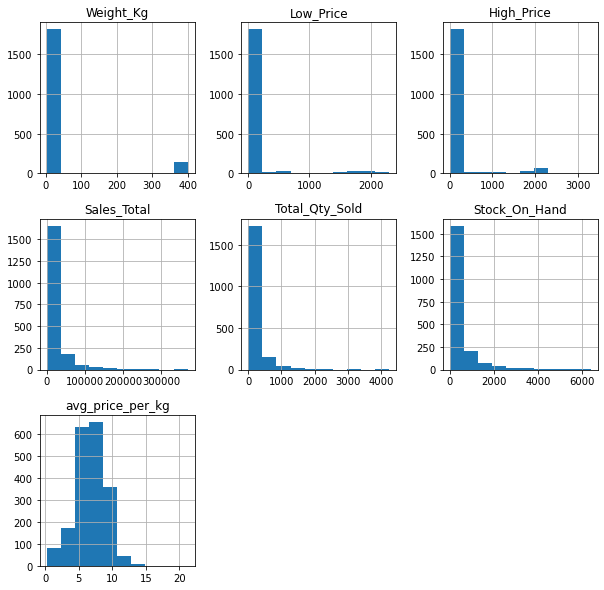

In [11]:
columns = ['Weight_Kg', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold', 'Stock_On_Hand','avg_price_per_kg' ] # create a list of all numerical columns
new_df_train[columns].hist(figsize=(10,10));

As expected, our average price per kg follows a normal distribution with most of our prices lieing on the R5 to R10 range. However the rest of our variables are affeted a lot by outliers.

Lets draw boxplots on our columns to confirm the outliers.

<AxesSubplot:xlabel='Weight_Kg'>

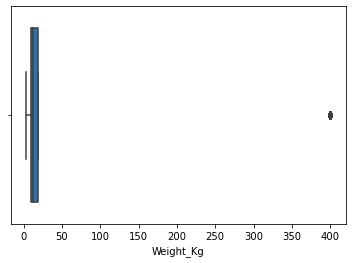

In [12]:

sns.boxplot(x='Weight_Kg', data=new_df_train)

<AxesSubplot:xlabel='Stock_On_Hand'>

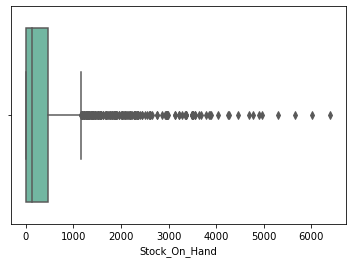

In [13]:
sns.boxplot(x = 'Stock_On_Hand', data=new_df_train, orient="h", palette="Set2")

<AxesSubplot:xlabel='avg_price_per_kg'>

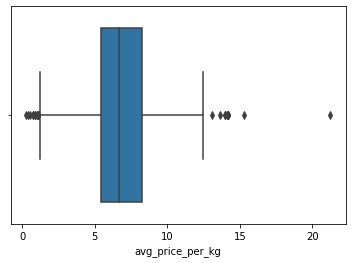

In [14]:
sns.boxplot(x='avg_price_per_kg', data=new_df_train)

<AxesSubplot:xlabel='Sales_Total'>

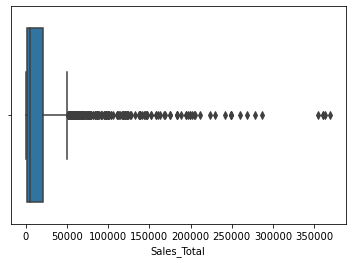

In [15]:
sns.boxplot(x='Sales_Total', data=new_df_train)


<AxesSubplot:xlabel='Total_Qty_Sold'>

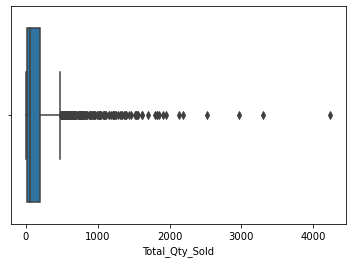

In [16]:
sns.boxplot(x='Total_Qty_Sold', data=new_df_train)

From the box plots above we can clearly see where our outliers are and can

Let us remove the outliers to see if we can get a more normal distribution of our numerical features.

In [17]:
df_train_o = new_df_train[new_df_train['Weight_Kg']<= 20]
df_train_o = df_train_o[df_train_o['Sales_Total']<= 50000]
df_train_o = df_train_o[df_train_o['avg_price_per_kg']<= 15]
df_train_o = df_train_o[df_train_o['Stock_On_Hand']<= 1300]
df_train_o = df_train_o[df_train_o['Total_Qty_Sold']<= 1300]

In [18]:
print(df_train_o.shape)
df_train_o.describe()

(1526, 13)


,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000,1526.000000
mean,12.635256,84.436435,100.823067,8852.199869,104.703145,1270.093578,231.437746,6.907136
std,4.029132,46.685901,52.746000,11324.096521,136.856293,1599.035083,289.767852,2.182577
min,3.000000,5.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.550000
25%,9.000000,50.000000,60.000000,971.250000,12.000000,148.050000,8.000000,5.560000
50%,12.000000,70.000000,84.000000,4060.000000,54.000000,659.400000,109.000000,6.685000
75%,18.300000,120.000000,140.000000,11550.000000,143.500000,1733.550000,348.750000,8.397500
max,18.300000,260.000000,270.000000,49860.000000,923.000000,8307.000000,1292.000000,14.210000


After removing the outliers we can see that our data is still enough to create a model out of. Lets see our distrbutions now.

array([[<AxesSubplot:title={'center':'Weight_Kg'}>,
        <AxesSubplot:title={'center':'Low_Price'}>,
        <AxesSubplot:title={'center':'High_Price'}>],
       [<AxesSubplot:title={'center':'Sales_Total'}>,
        <AxesSubplot:title={'center':'Total_Qty_Sold'}>,
        <AxesSubplot:title={'center':'Stock_On_Hand'}>],
       [<AxesSubplot:title={'center':'avg_price_per_kg'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

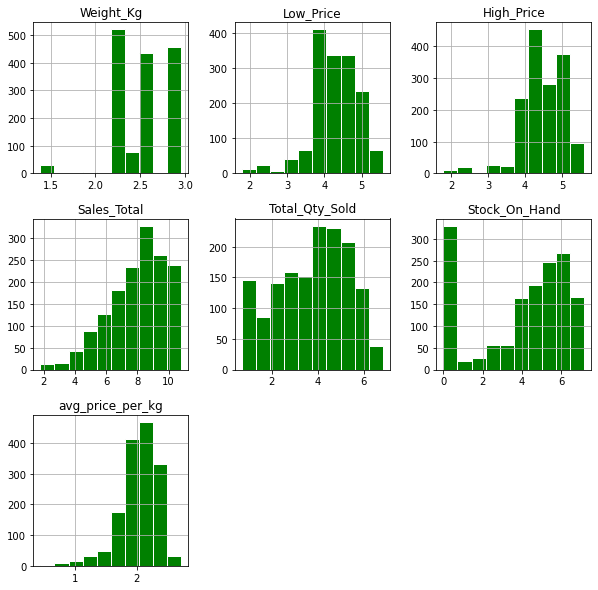

In [19]:
TotalLog = np.log(df_train_o[columns] + 1)
TotalLog.hist(color='green', edgecolor='white', figsize=(10,10))

## Multivariate Analysis

We will start by first analysing the relationships between our features.

At this stage I would like to seperate the Date column into day, month and year so that I can analyse the relationships it has in this dataset.


In [76]:
df_train_o['day'] = df_train_o['Date'].dt.day
df_train_o['month'] = df_train_o['Date'].dt.month
df_train_o['year'] = df_train_o['Date'].dt.year

In [77]:
df_train_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 7 to 64310
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Province          1526 non-null   object        
 1   Container         1526 non-null   object        
 2   Size_Grade        1526 non-null   object        
 3   Weight_Kg         1526 non-null   float64       
 4   Date              1526 non-null   datetime64[ns]
 5   Low_Price         1526 non-null   float64       
 6   High_Price        1526 non-null   float64       
 7   Sales_Total       1526 non-null   float64       
 8   Total_Qty_Sold    1526 non-null   int64         
 9   Total_Kg_Sold     1526 non-null   float64       
 10  Stock_On_Hand     1526 non-null   int64         
 11  avg_price_per_kg  1526 non-null   float64       
 12  day               1526 non-null   int64         
 13  month             1526 non-null   int64         
 14  year              1526 

In [21]:
df_train_o.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020
80,CAPE,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,13,3,2020
117,CAPE,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,30,12,2019
122,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,5,8,2020


We will first start by analysing our stocking capabilities which are in the Province and Weight_Kg columns. By looking at the relationship between the province were the produce is grown and the total KG's sold, we can then see which farmers give us the most sales.

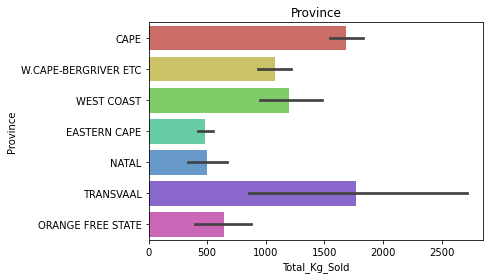

In [22]:
sns.barplot(x = 'Total_Kg_Sold',y= 'Province', data = df_train_o, palette="hls")
plt.title("Province");

As we can see, most of the apples that we sold came from the Transvaal followed by the Cape

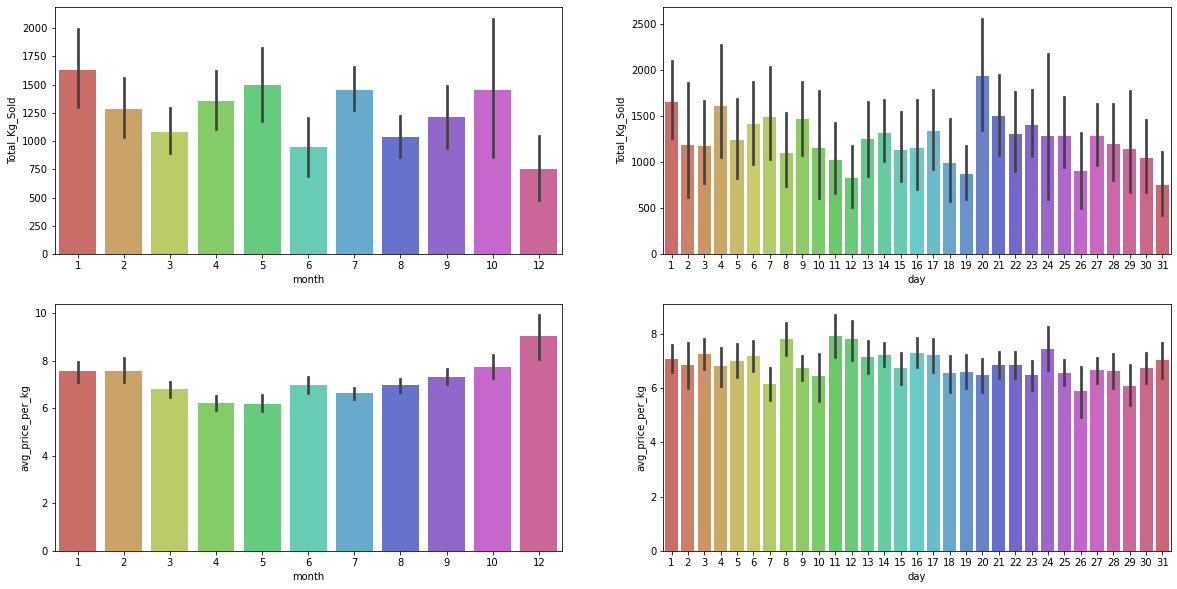

In [23]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.barplot(x = 'month',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,0])
sns.barplot(x = 'day',y= 'Total_Kg_Sold', data = df_train_o, palette="hls", ax=ax[0,1])
sns.barplot(x = 'month',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,0])
sns.barplot(x = 'day',y= 'avg_price_per_kg', data = df_train_o, palette="hls", ax=ax[1,1])

plt.show()

The top two graphs above show us our sales in KG per month and per day. We can see that we've sold more apples in January, may and July then in the other months and our biggest sales quantities happened on the 20th of the month.

The bottom two graphs above tell us the relationship between the months and days of the year and the  average price per kg. It tells us that the avg price per kg of apples is higher in December than in other months.These relationships can possibly guide our decisions on how much stock we need to have on hand on any given month.

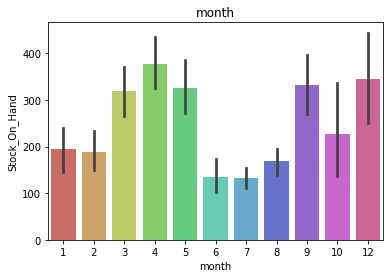

In [24]:
sns.barplot(x = 'month',y= 'Stock_On_Hand', data = df_train_o, palette="hls")
plt.title("month");

The graph above shows us the months where we have the most stock in storage. We can use our predictions on purchase behaviour of our customers to decide how much stock to keep on any given month.

In [25]:
df_train_o.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
Weight_Kg,1.000000,0.788554,0.874696,0.234361,-0.095921,0.147571,0.161826,0.485744,-0.060180,-0.073081,-0.045588
Low_Price,0.788554,1.000000,0.886864,0.144284,-0.156124,0.005982,0.089528,0.831026,-0.074253,0.022831,-0.153010
High_Price,0.874696,0.886864,1.000000,0.312705,-0.035650,0.176737,0.205196,0.772376,-0.072066,-0.012173,-0.130478
Sales_Total,0.234361,0.144284,0.312705,1.000000,0.830985,0.953019,0.215335,0.189959,-0.056709,-0.062858,0.042229
Total_Qty_Sold,-0.095921,-0.156124,-0.035650,0.830985,1.000000,0.923844,0.131386,-0.070477,-0.019124,-0.029160,0.056963
Total_Kg_Sold,0.147571,0.005982,0.176737,0.953019,0.923844,1.000000,0.191444,0.022730,-0.040291,-0.050316,0.057866
Stock_On_Hand,0.161826,0.089528,0.205196,0.215335,0.131386,0.191444,1.000000,0.128045,0.038944,-0.053472,-0.070896
avg_price_per_kg,0.485744,0.831026,0.772376,0.189959,-0.070477,0.022730,0.128045,1.000000,-0.080105,0.056267,-0.174513
day,-0.060180,-0.074253,-0.072066,-0.056709,-0.019124,-0.040291,0.038944,-0.080105,1.000000,0.020826,-0.019190
month,-0.073081,0.022831,-0.012173,-0.062858,-0.029160,-0.050316,-0.053472,0.056267,0.020826,1.000000,-0.429558


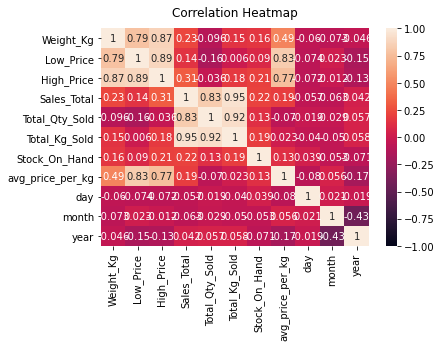

In [26]:
heatmap = sns.heatmap(df_train_o.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

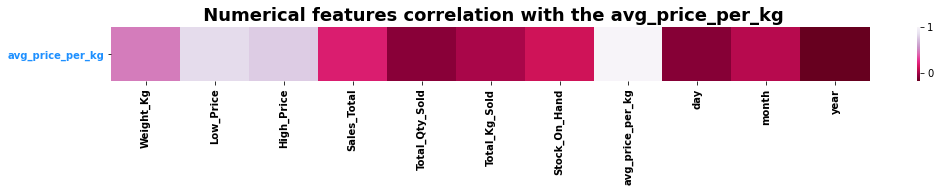

In [27]:
num=df_train_o.select_dtypes(exclude='object')
numcorr=num.corr()
f,ax=plt.subplots(figsize=(17,1))
sns.heatmap(numcorr.sort_values(by=['avg_price_per_kg'], ascending=False).head(1), cmap='PuRd_r')
plt.title(" Numerical features correlation with the avg_price_per_kg", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)


plt.show()

The graphs above show us heat maps of the correlations between our data. 

## Dummy Variable Encoding

We have already filtered the data to only include golden delicious apples as our commodities, so we will now drop the commodities column because it has the same repeated data.

In [28]:
df_train_o = df_train_o.drop(['Commodities'], axis = 1)


In [29]:
df_train_o

,Province,Container,Size_Grade,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,month,year
7,CAPE,JG110,2M,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,14,4,2020
40,CAPE,M4183,1S,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,4,5,2020
80,CAPE,JE090,2S,9.0,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,13,3,2020
117,CAPE,EC120,1M,12.0,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,30,12,2019
122,CAPE,JG110,2M,11.0,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,5,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64276,NATAL,EC120,1S,12.0,2020-03-04,96.0,96.0,1920.0,20,240.0,53,8.00,4,3,2020
64291,ORANGE FREE STATE,M4183,1X,18.3,2020-02-22,130.0,130.0,7280.0,56,1024.8,74,7.10,22,2,2020
64297,CAPE,JE090,2M,9.0,2020-04-22,50.0,60.0,4540.0,89,801.0,793,5.67,22,4,2020
64304,CAPE,JG110,2M,11.0,2020-03-04,30.0,40.0,2140.0,70,770.0,0,2.78,4,3,2020


In order to be able to use our categorical data (Province, Container, Size_Grade) in our model we will need to turn it into numerical data using dummy variable encoding.

In [30]:
df_dummies = pd.get_dummies(df_train_o)

#lets make sure that all the column names have underscores instead of whitespaces
df_dummies.columns = [col.replace(" ","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".","_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-","_") for col in df_dummies.columns]
#lets have a look at our data
df_dummies.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,day,...,Size_Grade_1L,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55,14,...,0,0,0,0,0,0,1,0,0,0
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51,4,...,0,0,1,0,0,0,0,0,0,0
80,9.0,2020-03-13,55.0,55.0,4840.0,88,792.0,181,6.11,13,...,0,0,0,0,0,0,0,1,0,0
117,12.0,2019-12-30,100.0,100.0,1200.0,12,144.0,119,8.33,30,...,0,1,0,0,0,0,0,0,0,0
122,11.0,2020-08-05,70.0,70.0,5600.0,80,880.0,0,6.36,5,...,0,0,0,0,0,0,1,0,0,0


In [31]:
df_dummies.shape

(1526, 39)

As we can see above our table now has 39 columns instead of 15 due to the dummy variables.

## Correlations and Model Structure

We will attempt to use our independant variables from the dummy variable dataframe to build a model that predicts average price per kg

In [32]:
# We will now move our target variable to be the last column of our table for ease of reference
column_titles = [col for col in df_dummies.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies=df_dummies.reindex(columns=column_titles)

Lets now check the correlation of our data after the dummy variables have been created

In [33]:
df_dummies.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,month,year,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
Weight_Kg,1.000000,0.788554,0.874696,0.234361,-0.095921,0.147571,0.161826,-0.060180,-0.073081,-0.045588,...,0.178798,0.010737,0.050949,0.479651,-0.258836,-0.335176,-0.389682,-0.092695,-0.099311,0.485744
Low_Price,0.788554,1.000000,0.886864,0.144284,-0.156124,0.005982,0.089528,-0.074253,0.022831,-0.153010,...,0.169738,0.028598,-0.003444,0.434252,-0.209981,-0.283482,-0.392448,-0.091695,-0.091014,0.831026
High_Price,0.874696,0.886864,1.000000,0.312705,-0.035650,0.176737,0.205196,-0.072066,-0.012173,-0.130478,...,0.182693,0.018443,0.013175,0.469807,-0.228859,-0.317296,-0.419601,-0.102304,-0.102860,0.772376
Sales_Total,0.234361,0.144284,0.312705,1.000000,0.830985,0.953019,0.215335,-0.056709,-0.062858,0.042229,...,0.043512,0.065710,-0.013319,-0.009348,-0.126875,-0.064689,-0.052988,-0.053436,-0.045993,0.189959
Total_Qty_Sold,-0.095921,-0.156124,-0.035650,0.830985,1.000000,0.923844,0.131386,-0.019124,-0.029160,0.056963,...,-0.060886,0.039358,-0.012499,-0.109838,-0.070581,0.057378,0.144891,-0.028475,-0.015317,-0.070477
Total_Kg_Sold,0.147571,0.005982,0.176737,0.953019,0.923844,1.000000,0.191444,-0.040291,-0.050316,0.057866,...,-0.008447,0.053071,-0.004937,-0.034212,-0.114047,-0.023724,0.037301,-0.043072,-0.037650,0.022730
Stock_On_Hand,0.161826,0.089528,0.205196,0.215335,0.131386,0.191444,1.000000,0.038944,-0.053472,-0.070896,...,0.073644,0.058071,-0.022315,0.005549,-0.069627,-0.035876,-0.100048,-0.065641,0.026501,0.128045
day,-0.060180,-0.074253,-0.072066,-0.056709,-0.019124,-0.040291,0.038944,1.000000,0.020826,-0.019190,...,0.007627,0.049310,0.011657,-0.037324,0.021358,-0.040964,0.025311,0.023642,-0.041273,-0.080105
month,-0.073081,0.022831,-0.012173,-0.062858,-0.029160,-0.050316,-0.053472,0.020826,1.000000,-0.429558,...,-0.034814,0.002380,-0.009354,-0.058915,0.069740,0.011819,-0.016448,-0.058038,0.019044,0.056267
year,-0.045588,-0.153010,-0.130478,0.042229,0.056963,0.057866,-0.070896,-0.019190,-0.429558,1.000000,...,0.004848,0.022210,0.006528,0.000016,-0.017092,0.007907,0.040212,0.019128,-0.007396,-0.174513


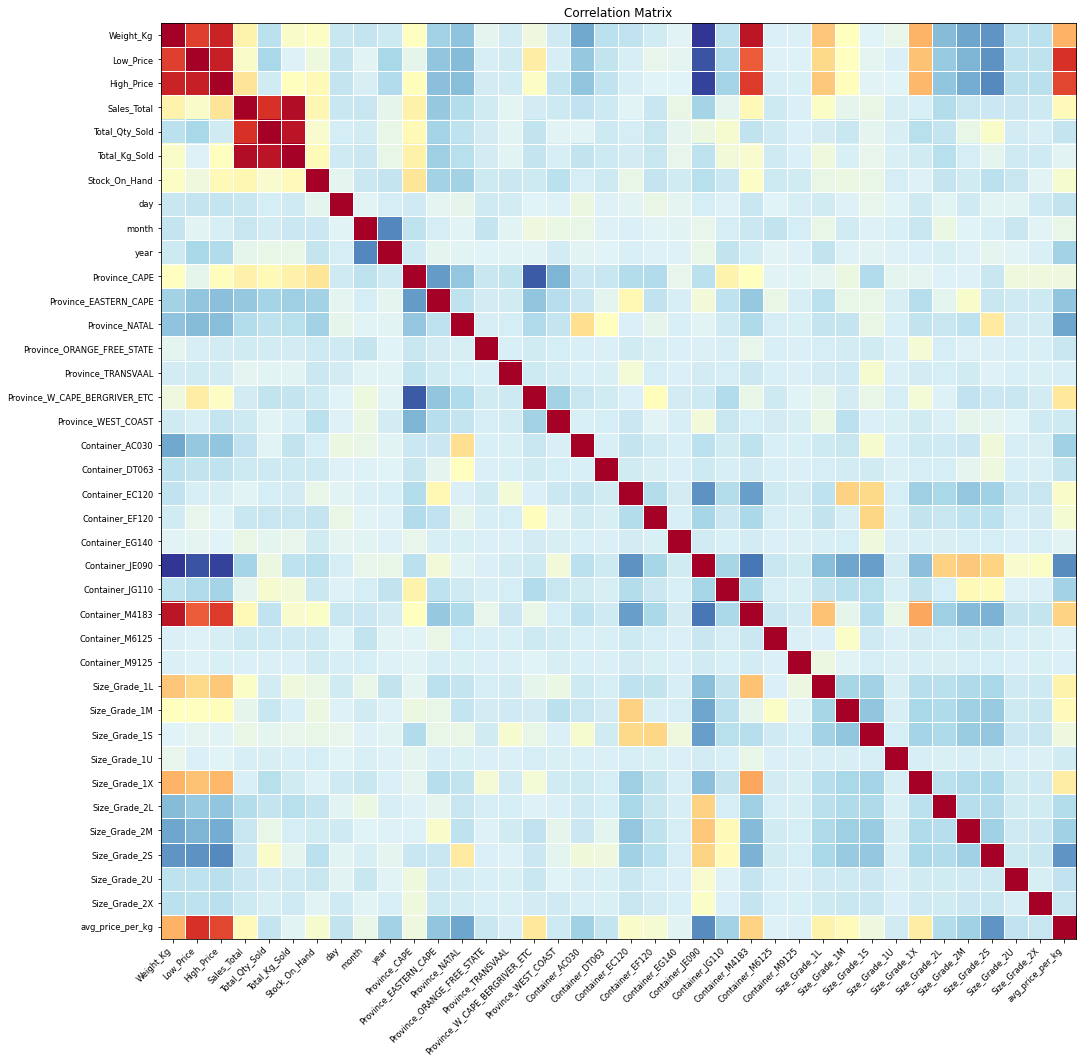

In [34]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(df_dummies.corr(), xnames = df_dummies.corr().columns, ax = ax);


As we can see we now have too many variables which are coursing a lot of redundancy and negatively correlated variables. As we investigate further, we will, at some point, have to drop some of the redundant variables in order to reduce the computational cost of our modeling and improve the performance of the model.


## Fitting the model

Lets try fitting the model as it currently is using statsmodels.ols to see what results the OLS model summary gives us.


In [35]:
#lets import the packages and generate the regression string
from statsmodels.formula.api import ols

# copy the DataFrame with all of the columns:
dfm = df_dummies.copy()

# create a ariable for the dependent variable:
y_name = 'avg_price_per_kg'
# create a variable for the independent variable :we will use all the columns in the model DataFrame
X_names = [col for col in dfm.columns if col != y_name]

# gererate the regression string
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

Formula:
	 avg_price_per_kg ~ Weight_Kg + Date + Low_Price + High_Price + Sales_Total + Total_Qty_Sold + Total_Kg_Sold + Stock_On_Hand + day + month + year + Province_CAPE + Province_EASTERN_CAPE + Province_NATAL + Province_ORANGE_FREE_STATE + Province_TRANSVAAL + Province_W_CAPE_BERGRIVER_ETC + Province_WEST_COAST + Container_AC030 + Container_DT063 + Container_EC120 + Container_EF120 + Container_EG140 + Container_JE090 + Container_JG110 + Container_M4183 + Container_M6125 + Container_M9125 + Size_Grade_1L + Size_Grade_1M + Size_Grade_1S + Size_Grade_1U + Size_Grade_1X + Size_Grade_2L + Size_Grade_2M + Size_Grade_2S + Size_Grade_2U + Size_Grade_2X


In [36]:
# Lets fit the model using the dfm dataframe that we just created
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

#we can now print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     92.91
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        19:04:16   Log-Likelihood:                -1391.7
No. Observations:                1526   AIC:                             3137.
Df Residuals:                    1349   BIC:                             4081.
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

Let us now create a new df_dummies table and drop the previous one in order not to assume any relationships beween our features.

In [37]:
df_dummies = pd.get_dummies(df_train_o, drop_first=True)

# Lets make sure that all the column names have underscores instead of whitespaces, fullstps and dashes
df_dummies.columns = [col.replace(" ", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace(".", "_") for col in df_dummies.columns]
df_dummies.columns = [col.replace("-", "_") for col in df_dummies.columns]

# Reorder columns with the dependent avg_price_per_kg variable as the last column
column_titles = [col for col in df_dummies.columns if col !=
                 'avg_price_per_kg'] + ['avg_price_per_kg']
df_dummies = df_dummies.reindex(columns=column_titles)

df_dummies.head()

,Weight_Kg,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,month,...,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X,avg_price_per_kg
7,11.0,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,14,4,...,0,0,0,0,0,1,0,0,0,4.55
40,18.3,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4,5,...,0,1,0,0,0,0,0,0,0,4.51
80,9.0,2020-03-13,55.0,55.0,4840.0,88,792.0,181,13,3,...,0,0,0,0,0,0,1,0,0,6.11
117,12.0,2019-12-30,100.0,100.0,1200.0,12,144.0,119,30,12,...,1,0,0,0,0,0,0,0,0,8.33
122,11.0,2020-08-05,70.0,70.0,5600.0,80,880.0,0,5,8,...,0,0,0,0,0,1,0,0,0,6.36


In [38]:
df_dummies.shape

(1526, 36)

We now have 36 columns instead of 39 that can possibly help us create a model to predict the average price per kg.

We will now use our 36 column table to get a OLS model summary

In [39]:
# We'll keep the model DataFrame, but only specify the columns we want to fit this time
X_names = [col for col in df_dummies.columns if col != y_name]

#gererate the regression string
formula_str = y_name+' ~ '+'+'.join(X_names)

# Lets fit the model using the dfm dataframe 
model = ols(formula=formula_str, data=dfm)
fitted = model.fit()

# print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     92.91
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        19:04:17   Log-Likelihood:                -1391.7
No. Observations:                1526   AIC:                             3137.
Df Residuals:                    1349   BIC:                             4081.
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The smallest eigenvalue has improved, but there is still mention of strong multicollinearity in the notes **\[2\]**

Let's continue to draw down on our variables now using their significance.

## Variable Selection by Correlation and Significance

We will now attempt to choose the variables that will work best to predict our dependant variable computing the correlations each variable has to to the dependant variable and choosing the ones that have the strongest correlations and the ones that are most significant.

In [40]:
#Lets start with computing the correlations between dependant variable and the independant variables
corrs = df_dummies.corr()['avg_price_per_kg'].sort_values(ascending=False)

In [41]:
# lets build a list of p-values and correlations coefficients for each variable
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'avg_price_per_kg']
for col in column_titles:
    p_val = round(pearsonr(df_dummies[col], df_dummies['avg_price_per_kg'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted[df_cp_sorted['P_Value']<0.1]

,Correlation_Coefficient,P_Value
Low_Price,0.831026,0.000000
Province_NATAL,-0.337978,0.000000
Province_EASTERN_CAPE,-0.228479,0.000000
Size_Grade_2M,-0.185118,0.000000
year,-0.174513,0.000000
Container_JG110,-0.174268,0.000000
Size_Grade_2S,-0.390918,0.000000
Container_EC120,0.145789,0.000000
Container_JE090,-0.411464,0.000000
High_Price,0.772376,0.000000


Using a logic test with a significance value of 5% or p-value < 0.05, we could infer that only 1 variable is not significant - Provice_WEST_COAST

We'll keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable called DataFrame X-data

In [42]:
# The dependent variable remains the same:
y_data = df_dummies[y_name]  #we prviously set y_name as avg_price_per_kg'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df_dummies[X_names]

We will also look for predictor variable pairs which have high corrolation with each other to avoid autocorrolation

In [43]:
#correlation matrix
corr = X_data.corr()

# Find rows and columns where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]

,Low_Price,High_Price,Weight_Kg,Container_M4183,Province_W_CAPE_BERGRIVER_ETC,Size_Grade_1X,Sales_Total,Size_Grade_1M,Container_EC120,Stock_On_Hand,...,day,Size_Grade_2U,Size_Grade_2L,Container_JG110,year,Size_Grade_2M,Province_EASTERN_CAPE,Province_NATAL,Size_Grade_2S,Container_JE090
Low_Price,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High_Price,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight_Kg,NaN,NaN,1.000000,0.919561,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_M4183,NaN,NaN,0.919561,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Province_W_CAPE_BERGRIVER_ETC,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1X,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Total,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size_Grade_1M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Container_EC120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_On_Hand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will isolate the sections of the matrix, where the off-diagonal correlations are high:

In [44]:
# K_G
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

,Container_M4183,Weight_Kg
Weight_Kg,0.919561,1.000000
Container_M4183,1.000000,0.919561



We find that `Weight_kg` and `Container_M4183` are highly correlated.

This is also visible looking back at the correlation coefficient heatmap and matrix from earlier, but a more focused / subset view of the matrix is useful to isolate the coefficients of interest.

Considering which predictor variable to drop, `Weight_kg` is slightly better correlated (and lower p-value) to the dependent variable `avg_price_per_kg`, so let's drop 'Container_M4183' form the feature dataframe.

In [45]:
# Lets do a ols summary with a new subset that doesnt contain the Container_M4183 variable
X_remove = ['Container_M4183']
X_corr_names = [col for col in X_names if col not in X_remove]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

Formula:
	avg_price_per_kg ~ Low_Price + High_Price + Weight_Kg + Province_W_CAPE_BERGRIVER_ETC + Size_Grade_1X + Sales_Total + Size_Grade_1M + Container_EC120 + Stock_On_Hand + Container_EF120 + Size_Grade_1S + month + Province_ORANGE_FREE_STATE + Size_Grade_2X + Total_Qty_Sold + Container_DT063 + day + Size_Grade_2U + Size_Grade_2L + Container_JG110 + year + Size_Grade_2M + Province_EASTERN_CAPE + Province_NATAL + Size_Grade_2S + Container_JE090


In [46]:
# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# print the summary
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:       avg_price_per_kg   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     552.7
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        19:04:17   Log-Likelihood:                -1555.5
No. Observations:                1526   AIC:                             3165.
Df Residuals:                    1499   BIC:                             3309.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

# Variable Selection by Variance Thresholds

Lest use variance thresholds to help us remove features that have a variance that is lower than the decided threshold.

Lets change the datetime column from datetime to int in order to be able to normalize the data.

In [47]:
df_dummies['day'] = df_dummies['Date'].dt.day
df_dummies['month'] = df_dummies['Date'].dt.month
df_dummies['year'] = df_dummies['Date'].dt.year
df_dummies=df_dummies.drop(['Date'], axis = 1)

In [48]:
# Separate data into independent (X) and dependent (y) variables
X_names = list(df_dummies.columns)
X_names.remove(y_name)
X_data = df_dummies[X_names]
y_data = df_dummies[y_name]

In [49]:
# Normalize data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)
X_normalize = pd.DataFrame(X_scaled, columns=X_data.columns)

### Variance Threshold in Scikit Learn
Implementing Variance Threshold in Scikit Learn.

In [50]:
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object
selector = VarianceThreshold(threshold=0.03)

# Use the object to apply the threshold on data
selector.fit(X_normalize)

VarianceThreshold(threshold=0.03)

A Variance Threshold of 0.03 has been applied to the data. Let's look at the calculated variance for each predictive variable.

In [51]:
# Get column variances
column_variances = selector.variances_

vars_dict = {}
vars_dict = [{"Variable_Name": c_name, "Variance": c_var}
             for c_name, c_var in zip(X_normalize.columns, column_variances)]
df_vars = pd.DataFrame(vars_dict)
df_vars.sort_values(by='Variance', ascending=False)

,Variable_Name,Variance
20,Container_JE090,0.224643
22,Container_M4183,0.209790
14,Province_W_CAPE_BERGRIVER_ETC,0.187336
17,Container_EC120,0.176398
26,Size_Grade_1S,0.156747
25,Size_Grade_1M,0.145628
31,Size_Grade_2S,0.138743
30,Size_Grade_2M,0.120570
10,Province_EASTERN_CAPE,0.114368
28,Size_Grade_1X,0.093338


The above table shows the variances of the individual columns before any threshold is applied. It allows us to revise our initial variance threshold if we feel that we might exclude important variables.

Next we need to extract the results and use them to select our new columns - which form a subset of all the columns.

In [52]:
# Select new columns
X_new = X_normalize[X_normalize.columns[selector.get_support(indices=True)]]

# Save variable names for later
X_var_names = X_new.columns

# View first few entries
X_new.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Kg_Sold,Stock_On_Hand,day,month,year,Province_EASTERN_CAPE,...,Container_EF120,Container_JE090,Container_JG110,Container_M4183,Size_Grade_1M,Size_Grade_1S,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S
0,0.522876,0.176471,0.169811,0.320830,0.423531,0.000000,0.433333,0.272727,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.294118,0.433962,0.642162,0.854697,0.342879,0.100000,0.363636,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.392157,0.196078,0.188679,0.096981,0.095014,0.140093,0.400000,0.181818,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.588235,0.372549,0.358491,0.023970,0.016980,0.092105,0.966667,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.522876,0.254902,0.245283,0.112225,0.105612,0.000000,0.133333,0.636364,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
X_new.shape

(1526, 24)

With a threshold of 0.03 we have gone from 39 to 24 predictors.

In [54]:
# Create Variance Threshold objects
selector_1 = VarianceThreshold(threshold=0.05)
selector_2 = VarianceThreshold(threshold=0.1)
selector_3 = VarianceThreshold(threshold=0.15)

In [55]:
selector_1.fit(X_normalize)

VarianceThreshold(threshold=0.05)

In [56]:
selector_2.fit(X_normalize)

VarianceThreshold(threshold=0.1)

In [57]:
selector_3.fit(X_normalize)

VarianceThreshold(threshold=0.15)

In [58]:
# subset the columns for each threshold
X_1 = X_normalize[X_normalize.columns[selector_1.get_support(indices=True)]]
X_2 = X_normalize[X_normalize.columns[selector_2.get_support(indices=True)]]
X_3 = X_normalize[X_normalize.columns[selector_3.get_support(indices=True)]]

Now let's graph the number of predictors by the thresholds to investigate the relationship:

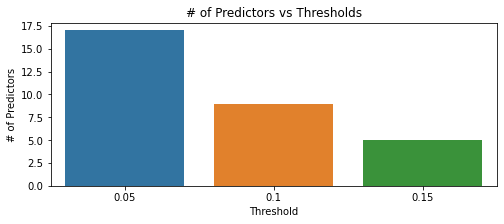

In [59]:
# Create figure and axes
f, ax = plt.subplots(figsize=(8, 3), nrows=1, ncols=1)

# Create list of titles and predictions to use in for loop
subset_preds = [X_1.shape[1], X_2.shape[1], X_3.shape[1]]
thresholds = ['0.05', '0.1', '0.15']

# Plot graph
ax.set_title('# of Predictors vs Thresholds')
ax.set_ylabel('# of Predictors')
ax.set_xlabel('Threshold')
sns.barplot(x=thresholds, y=subset_preds)
plt.show()

We can see from the above graph that as we increase the threshold, the number of dimensions decrease

##  Model prediction of Average price per kg

With the reduction of features, we can now attempt to fit models to our dataframe.

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Pre-processing

Lets do some pre processing of our data to make sure its ready for modelling

In [61]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.20,
                                                    shuffle=False)

In [62]:
# Get training and testing data for variance threshold model
X_var_train = X_train[X_var_names]
X_var_test = X_test[X_var_names]

In [63]:
# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

## Fit models

We will instantiate and fit our models

In [64]:
lm = LinearRegression()
lm_corr = LinearRegression()
lm_var = LinearRegression()

In [65]:
lm.fit(X_train, y_train);
lm_corr.fit(X_corr_train,y_train);
lm_var.fit(X_var_train,y_train);

### Assessing model accuracy

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

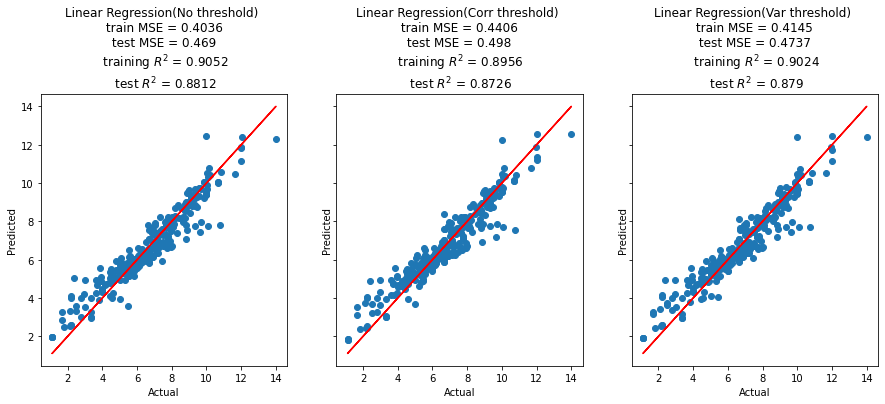

In [67]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15, 5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
train_pred = [lm.predict(X_train),
              lm_corr.predict(X_corr_train),
              lm_var.predict(X_var_train)]
test_pred = [lm.predict(X_test),
             lm_corr.predict(X_corr_test),
             lm_var.predict(X_var_test)]
title = ['No threshold', 'Corr threshold', 'Var threshold']

# Key:
# No threshold - linear regression with all predictive variables
# Corr threshold - linear regression with correlation thresholded predictive variables
# Var threshold - linear regression with variance thresholded predictive variables


# Loop through all axes to plot each model's results
for i in range(3):
    test_mse = round(mean_squared_error(test_pred[i], y_test), 4)
    test_r2 = round(r2_score(test_pred[i], y_test), 4)
    train_mse = round(mean_squared_error(train_pred[i], y_train), 4)
    train_r2 = round(r2_score(train_pred[i], y_train), 4)
    title_str = f"Linear Regression({title[i]}) \n train MSE = {train_mse} \n " + \
                f"test MSE = {test_mse} \n training $R^{2}$ = {train_r2} \n " + \
                f"test $R^{2}$ = {test_r2}"
    ax[i].set_title(title_str)
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test, y_test, 'r')
    ax[i].scatter(y_test, test_pred[i])

Did we improve the model??
Ask Trevor for guidance if this is the way its meant to look.

## Implementing Scaling
Let's see how we standardise the features

In [68]:
# split data into predictors and response
X = df_dummies.drop('avg_price_per_kg', axis=1)
y = df_dummies['avg_price_per_kg']

In [69]:
# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler

In [70]:
# create scaler object
scaler = StandardScaler()

In [71]:
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [72]:
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,day,month,year,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,-0.405991,-0.737861,-0.963859,0.631410,1.573676,1.407501,-0.798962,-0.200720,-0.635602,0.180212,...,-0.044382,-0.463647,-0.491589,-0.036226,-0.341047,-0.292145,2.476054,-0.446862,-0.10614,-0.126407
1,1.406408,-0.095058,0.363691,2.046556,2.070710,3.647336,0.730349,-1.361821,-0.258198,0.180212,...,-0.044382,-0.463647,2.034219,-0.036226,-0.341047,-0.292145,-0.403868,-0.446862,-0.10614,-0.126407
2,-0.902539,-0.630728,-0.869034,-0.354423,-0.122089,-0.299087,-0.174120,-0.316830,-1.013005,0.180212,...,-0.044382,-0.463647,-0.491589,-0.036226,-0.341047,-0.292145,-0.403868,2.237828,-0.10614,-0.126407
3,-0.157717,0.333477,-0.015609,-0.675966,-0.677598,-0.704464,-0.388154,1.657042,2.383630,-5.549024,...,-0.044382,2.156815,-0.491589,-0.036226,-0.341047,-0.292145,-0.403868,-0.446862,-0.10614,-0.126407
4,-0.405991,-0.309326,-0.584559,-0.287287,-0.180563,-0.244036,-0.798962,-1.245711,0.874014,0.180212,...,-0.044382,-0.463647,-0.491589,-0.036226,-0.341047,-0.292145,2.476054,-0.446862,-0.10614,-0.126407


Taking a look at one of the variables as an example (Sales_Total).

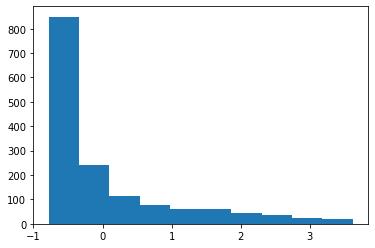

In [73]:
plt.hist(X_standardise['Sales_Total'])
plt.show()

Furthermore, the variance within each variable in the data is now equal to one.

In [74]:
X_standardise.describe().loc['std']

Weight_Kg                        1.000328
Low_Price                        1.000328
High_Price                       1.000328
Sales_Total                      1.000328
Total_Qty_Sold                   1.000328
Total_Kg_Sold                    1.000328
Stock_On_Hand                    1.000328
day                              1.000328
month                            1.000328
year                             1.000328
Province_EASTERN_CAPE            1.000328
Province_NATAL                   1.000328
Province_ORANGE_FREE_STATE       1.000328
Province_TRANSVAAL               1.000328
Province_W_CAPE_BERGRIVER_ETC    1.000328
Province_WEST_COAST              1.000328
Container_DT063                  1.000328
Container_EC120                  1.000328
Container_EF120                  1.000328
Container_EG140                  1.000328
Container_JE090                  1.000328
Container_JG110                  1.000328
Container_M4183                  1.000328
Container_M6125                  1